In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
mu = 70 # mean of the distribution
std = 10 # standard deviation 
sample = 1000 # number of samples

In [4]:
data = np.random.normal(mu, std, sample)

In [5]:
def normal_pdf(x, mu, std):
    return 1/(std*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/std)**2)

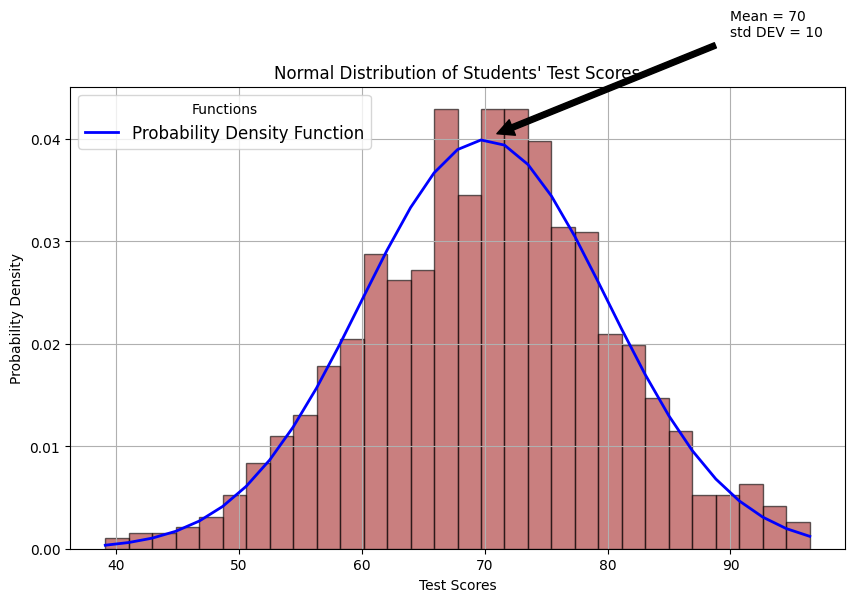

In [14]:
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='brown', edgecolor='black')
plt.plot(bins, normal_pdf(bins, mu, std), color='blue', linewidth=2, label='Probability Density Function')
plt.title("Normal Distribution of Students' Test Scores")
plt.xlabel("Test Scores")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend(loc='upper left', fontsize=12, title='Functions')
plt.annotate('Mean = 70\nstd DEV = 10', xy=(mu, 0.04), xytext=(mu+20, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
